In [5]:
# Importing necessary libraries
import os
import pandas as pd
import datetime

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression

# **Model Pipeline**

Since, the training data is stored in different csv files, we will create a simple pipeline where the flow of data will be as followed-


1. Reading the csv file with data of the stock.
2. Visualizing the data.
3. Preprocessing the data to fit in the model.  
4. Training the model on the preprocessed data.
5. Predicitng the target vallues for the next 100 days.



In [6]:
path = '/Dataset/TRAIN' # Storing the path of the folder holding the csv files

In [7]:
# For visualization of data of the stock we need to read the csv file and convert it to a DataFrame using pandas library
path_1 = 'Dataset/TRAIN/003.csv'
df = pd.read_csv(path_1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2007-01-02,127.0,133.00,127.00,132.00,76.526367,420128,0.0,0.0
1,2007-01-03,131.5,133.00,127.25,127.25,73.772598,517141,0.0,0.0
2,2007-01-04,125.0,127.00,121.75,122.25,70.873871,679753,0.0,0.0
3,2007-01-05,118.0,121.25,115.00,120.50,69.859299,1503804,0.0,0.0
4,2007-01-08,121.5,124.50,121.50,123.75,71.743469,547970,0.0,0.0


1. Date- The historical date.
2. Open- Opening asset price for the day.
3. High- Highest asset price for the day.
4. Low- Lowest asset price for the day.
5. Close*- Closing asset price for the day. (to be predicted)
6. Adj Close- Adjusted closing price (considering dividends).
7. Volume- Volume traded for the day.
8. Dividend- Dividend yield for the day.
9. Stock Splits- Announced stock split (0 if none)

Here, our features on which model will be trained are date, opening price, highest price, lowest price, Adjusted Closing price, volume, dividend and stock splits.

Our target is Closing price. We will train the model on the provided features and its corresponding target values and then we will predict the closing price for the next 100 days.




# Data Visualization
   Data can be complex and difficult to understand in its raw form. Visualization simplifies this complexity
  by representing data visually, making it easier for humans to grasp patterns, trends, and insights

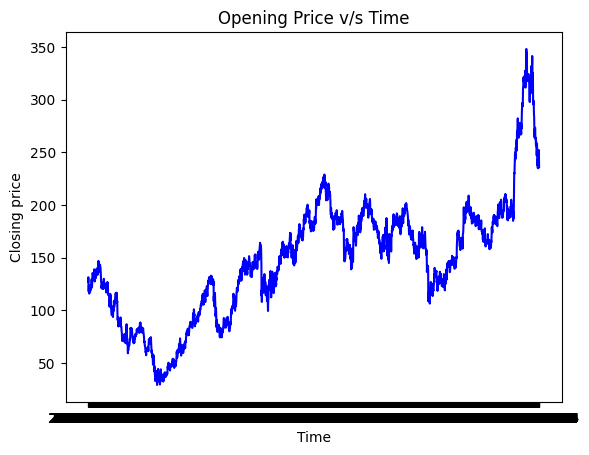

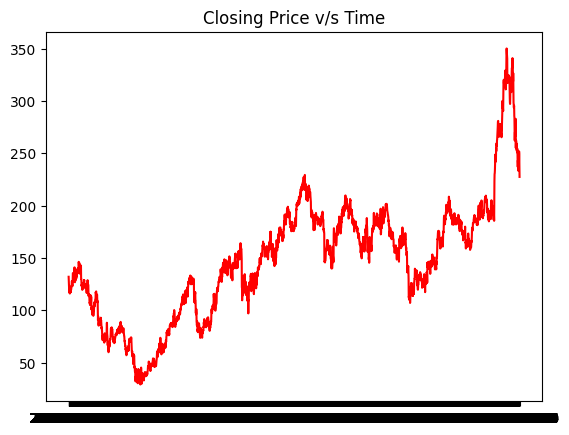

In [8]:
# Create two figures
fig1 = plt.figure()
fig2 = plt.figure()

# Create plots on each figure
ax1 = fig1.add_subplot(111)
ax1.plot(df['Date'], df['Open'], c='b', label='Opening Price v/s Time')
ax1.set_title('Opening Price v/s Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Opening Price')

ax2 = fig2.add_subplot(111)
ax2.plot(df['Date'], df['Close'], c='r', label='Closing Price v/s Time')
ax2.set_title('Closing Price v/s Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing price')

# Show the plots
plt.show()

**LINEAR REGRESSION MODEL - TRAINING and INFERENCE**


In [9]:
# Creating a function which is based on the model pipeline stated above and here we will use the sklearn Linear Regression model

model=LinearRegression()

def predictor_linear(path):

  # Read the CSV file
  df = pd.read_csv(path)

  #The dates in the dataset are in string format. A linear regression model does not expect string values. Thus we need to convert these dates to integer, therefore onverting them to unix timestamp
  date_int=[]
  for date in df['Date']:
    date_obj=datetime.datetime.strptime(date,"%Y-%m-%d")
    unix_timestamp=int(date_obj.timestamp())
    date_int.append(unix_timestamp)

  df['Date']=date_int

  #Separating features and labels from the dataframe
  features=df.drop('Close',axis=1)
  label=df.pop('Close')

  #splitting the train and test data
  X_train,X_test,Y_train,Y_test = train_test_split(features,label, test_size=100 ,shuffle=False)

  # training it on the train data
  model.fit(X_train,Y_train)

  # Predicting closing price for next 100 days
  Y_pred = model.predict(X_test)

  #calculating mean absolute percentage error using sklearn metrics
  mape=mean_absolute_percentage_error(Y_test,Y_pred)
  print(mape)

  #making the required prediction dataframe for submission csv using prices and ids
  ids=[]
  for index, value in enumerate(Y_pred):
    ID = f"{os.path.splitext(os.path.basename(path))[0]}_#{index+1}"
    ids.append(ID)

  pred_df=pd.DataFrame({'ID':ids,'Price':Y_pred})

  return pred_df,mape


In [12]:
# Specifying the folder path in which CSV files are stored
folder_path = "Dataset/TRAIN"
dfs=[] # Creating an empty list to store the DataFrames with the predicted values to concatenate in one submission file later on
mapes=[]#Creating an empty list to store the MAPE of all the stocks
# Passing each CSV file in the defined function to generate prices for each stock
for filename in os.listdir(folder_path):
  stock_df = os.path.join(folder_path,filename)
  price,mape=predictor_linear(stock_df)
  dfs.append(price)
  mapes.append(mape)

# Mean of all MAPE values of stocks
print(sum(mapes))

# Concatenating the predicted data into one CSV file and saving it
dfsconcat = pd.concat(dfs)
dfsconcat.columns = ['ID','Price']

0.007160206379497286
0.007331754596339343
0.003683789681502918
0.0039061499892953113
0.010211854333304847
0.00774561744412596
0.005702576511490751
0.005086776213186223
0.003428081493209392
0.003669774450958137
0.0044216230761177895
0.007507464093164194
0.007338639029126478
0.00940603031253217
0.0023238928049772053
0.008791399193484154
0.003695130894895082
0.005141799378017184
0.006905520970548637
0.005996225535665294
0.003041984512891362
0.006343344288128772
0.008333547067806408
0.03452272980579745
0.004531372964243474
0.012260465704299317
0.0005410550821092661
0.005332091621800554
3.6557157280327033e-16
0.003540993011632326
0.00449527859157979
0.0067162223531455935
0.005181149700649631
0.008211520150724835
0.0034924402631240775
0.01109468106760903
0.002440617225916286
2.419560699336568e-09
0.007620073710792672
0.00559154997207526
0.005522056514295634
0.005468099468723103
0.008084157434718657
0.008444895571900826
0.015045696955363645
0.0067175161702318666
0.007537628276242836
0.0040289

In [13]:
# saving predictions as csv
dfsconcat.to_csv('Linear.csv',index=False)

Text(0, 0.5, 'Closing Price')

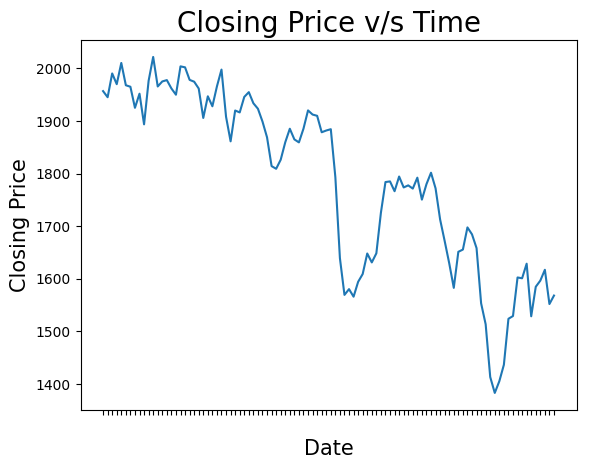

In [14]:
# Visualizing Predicted Data for one stock
plt.plot(dfsconcat['ID'][0:100],dfsconcat['Price'][0:100])
plt.title('Closing Price v/s Time',size=20)
plt.xticks(c='white')
plt.xlabel('Date',size=15,)
plt.ylabel('Closing Price',size=15)